>![image](jmulogo.png)
>
> # Math 248 Computers and Numerical Algorithms
> # Hala Nelson
> # Weeks 9-10: Fixed Point Iteration
___
___

# Fixed point iteration (FPI): 
## $x_0$ is the starting point, then $x_{i+1}=f(x_i)$. Get the sequence $\{x_0,x_1,x_2\dots\}$ generated by consecutive applications of $f$. Under the right conditions on $f$ and $x_0$, this sequence converges to a fixed point $x^*$ of $f$ (so $f(x^*)=x^*$).

1. **Numerical observation of asymptotic behaviors:** Convergence to a limit $x^*$ (must be the fixed point of $f$), divergence: $\infty$ (growing without a bound), periodic behavior, or chaotic behavior.

2. **How to capture the fixed point(s) of a function $f(x)$?**

- Analytically: Solve the equation $f(x^*)=x^*$ for $x^*$ (if an analytical solution is possible). Strengths? Weaknesses?
- Graphically: Plot the graphs of $y=f(x)$ and $y=x$ and locate the point(s) of intersection, if any. Strengths? Weaknesses?
- Numerically (FPI): Make a smart guess for $x_0$ using the graph, then generate an FPI near $x^*$. If it converges, then a fixed point is captured. Strengths? Weaknesses?

## Theorem 1: if the FPI converged then it captured a fixed point:
For a continuous function $f$, if the FPI converges then the limit must be a fixed point of $f$ (proof required).

## Theorem 2: **Fixed Point Iteration Theorem: the choice of $x_0$, the starting point for the FPI, matters** 
 Let $x^*$ be a fixed point of a function $f$. If $f$ and $f'$ are continuous on the interval $[x^*-\delta, x^*+\delta]$, $\delta>0$, and $|f'(x)|<K<1$ on $(x^*-\delta, x^*+\delta)$ then for any starting point $x_0\in(x^*-\delta, x^*+\delta)$, the FPI $x_{i+1}=f(x_i)$ converges to $x^*$ as $i\to\infty$. 
 
 The proof of the fixed point theorem uses the Mean Value Theorem: This theorem relates information about the function with the information about its derivative.
___
___

# Various Asymptotic Behaviors for the Fixed Point Iteration
Each of the following programs conveys a different asymptotic behavior for the fixed point iteration for the given function. For each, find the generating function, calculate its fixed points, and write a program that shows the indicated behavior. 

1. **Convergence:** $x_{i+1}=\sin(x_i)$
2. **Divergent to infinity:** $x_{i+1}=2x_i$
3. **Divergent and periodic:** $x_{i+1}=-x_{i}, x_0=1$
4. **Divergent and chaotic:** $x_{i+1}=3.7x_i(1-x_i), x_0=0.5$ (logistic map).


# Example 1 
## Write a program that uses the fixed point iteration to capture the fixed point of the function $f(x)=\cos(x)$. Here, it doesn't matter what the starting point is, the FPI $x_{i+1}=\cos(x_i)$ will catch the fixed point. This will be proved next week.

This means we need to find $x^*$ such that $\cos(x^*)=x^*$


 The FPI sequence generated by f(x)=cos x is x=

 [3, -0.9899924966004454, 0.5486961336030971, 0.853205311505747, 0.6575716719440716, 0.7914787496844161, 0.7027941118082985, 0.7630391877968155, 0.7227389047849775, 0.7499969196947134, 0.7316909685258257, 0.7440456819525396, 0.7357345682868414, 0.7413379612461033, 0.7375657269232188, 0.7401077700526904, 0.7383958863975351, 0.7395492425705097, 0.7387724239832231, 0.7392957417755152, 0.7389432483650883, 0.7391807011172313, 0.739020754151705, 0.7391284981950723, 0.7390559213481233, 0.7391048103648462, 0.73907187830735, 0.7390940618155815, 0.7390791187730535, 0.7390891846023451, 0.7390824041459527, 0.7390869715462552, 0.7390838948919729, 0.7390859673639892, 0.7390845713222185, 0.7390855117128889, 0.739084878254485, 0.7390853049597148, 0.7390850175259521, 0.7390852111447982, 0.7390850807208171, 0.7390851685759808, 0.7390851093956863, 0.7390851492602448, 0.7390851224069988, 0.7390851404956684, 0.739085128310923, 0.7390851365187141, 0.73908513

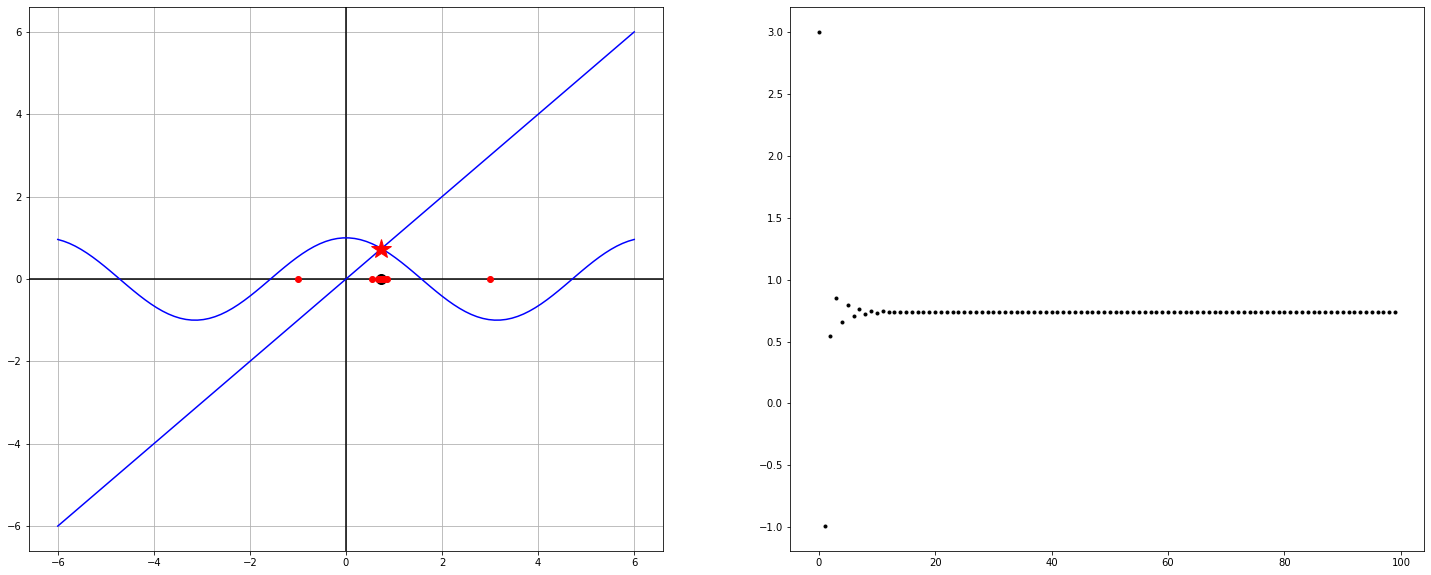

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# define the generating function f(x)
def f(x):
    return np.cos(x)
# name the function as a string (for output to look better, purely aesthetic)
fn='cos x'

# Let's build a sequence 
x=[3]
n=100 # number of points you want to generate
for i in range(1,n):
    a=x[len(x)-1] # call the last element of the sequence x
    x.append(f(a))
print(f'\n The FPI sequence generated by f(x)={fn} is x=\n\n',x)

# Let's visualize the sequence
# Set the figure
fig,subs=plt.subplots(nrows=1,ncols=2,figsize=(25,10))

# plot the cos(x) function, the fixed point, and the convergence of the sequence on the x-axis
subs[0].grid()
subs[0].axhline(y=0, color='k') # shows the x-axis
subs[0].axvline(x=0, color='k') # shows the v-axis
x1=np.linspace(-6,6,100)
subs[0].plot(x1,f(x1),'b')
subs[0].plot(x1,x1,'b')
subs[0].plot(x[len(x)-1],x[len(x)-1],'r*',markersize=20) # highlight the fixed point
subs[0].plot(x[len(x)-1],0,'k.',markersize=20) # highlight the point the FPI converged to
subs[0].plot(x,np.zeros(n,),'r.',markersize=12) # this plots the FPI sequence that we generated on the x-axis

# plot the sequence against its index
subs[1].plot(x,'k.')

# Prove analytically that the FPI $x_{i+1}=\cos(x_i)$ converges to a fixed point irrespective of the starting point $x_0$ of the FPI. (Hint: Use the fixed point iteration theorem).

The derivative of $\cos(x)$ is $f'(x)=-\sin(x)$, so $|f'(x)|=|-\sin(x)|=|\sin(x)|\le 1$ for all $x\in \mathbb{R}$, however, it is equal to one only at isolated points so the FPI will not get stuck there, therefore, using the FPI theroem, the FPI will converge to $x^*$ irrespective of where we start.

# Example 2

## Generating function: f(x)=2x. Divergent to infinity behavior unless we start at zero (then we would stay at zero)


 The FPI sequence generated by f(x)=2x is x=

 [3, 6, 12, 24, 48]


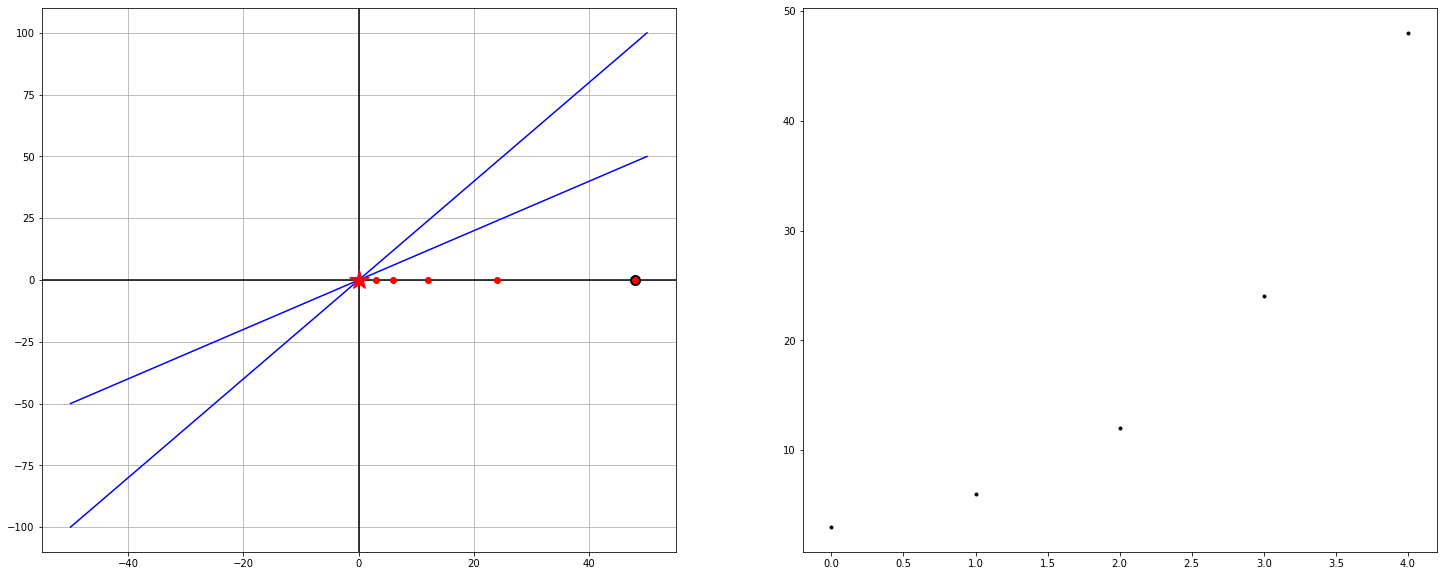

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# define the generating function f(x)
def f(x):
    return 2*x
# name the function as a string (for output to look better, purely aesthetic)
fn='2x'

# Let's build a sequence 
x=[3]
n=5 # number of points you want to generate
for i in range(1,n):
    a=x[len(x)-1] # call the last element of the sequence x
    x.append(f(a))
print(f'\n The FPI sequence generated by f(x)={fn} is x=\n\n',x)

# Let's visualize the sequence
# Set the figure
fig,subs=plt.subplots(nrows=1,ncols=2,figsize=(25,10))

# plot the cos(x) function, the fixed point, and the convergence of the sequence on the x-axis
subs[0].grid()
subs[0].axhline(y=0, color='k') # shows the x-axis
subs[0].axvline(x=0, color='k') # shows the v-axis
x1=np.linspace(-50,50,100)
subs[0].plot(x1,f(x1),'b')
subs[0].plot(x1,x1,'b')
subs[0].plot(0,0,'r*',markersize=20) # highlight the fixed point
subs[0].plot(x[len(x)-1],0,'k.',markersize=20)
subs[0].plot(x,np.zeros(n,),'r.',markersize=12)

# plot the sequence against its index
subs[1].plot(x,'k.')

# Example 3
## Generating function f(x)=-x. Non-convergent periodic behavior unless we start at zero (then we would stay at zero). Still the FPI does not capture the fixed point.


 The FPI sequence generated by f(x)=-x is x=

 [1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1]


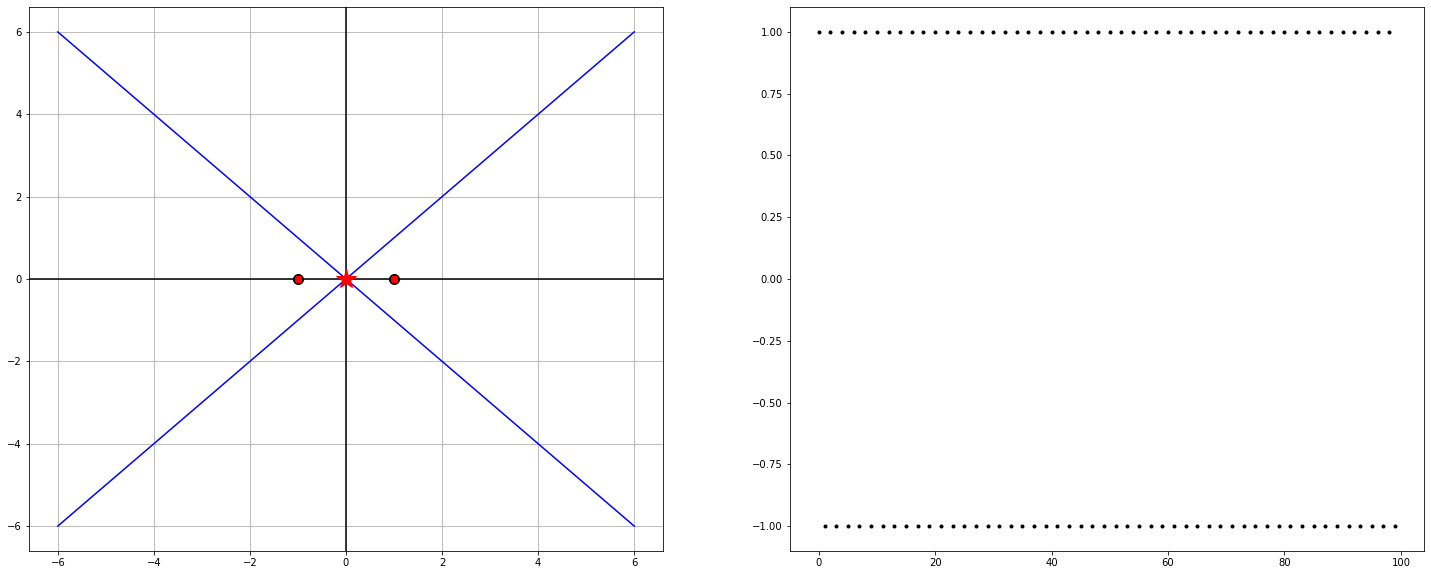

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# define the generating function f(x)
def f(x):
    return -x
# name the function as a string (for output to look better, purely aesthetic)
fn='-x'

# Let's build a sequence 
x=[1]
n=100 # number of points you want to generate
for i in range(1,n):
    a=x[len(x)-1] # call the last element of the sequence x
    x.append(f(a))
print(f'\n The FPI sequence generated by f(x)={fn} is x=\n\n',x)

# Let's visualize the sequence
# Set the figure
fig,subs=plt.subplots(nrows=1,ncols=2,figsize=(25,10))

# plot the cos(x) function, the fixed point, and the convergence of the sequence on the x-axis
subs[0].grid()
subs[0].axhline(y=0, color='k') # shows the x-axis
subs[0].axvline(x=0, color='k') # shows the v-axis
x1=np.linspace(-6,6,100)
subs[0].plot(x1,f(x1),'b')
subs[0].plot(x1,x1,'b')
subs[0].plot(0,0,'r*',markersize=20) # highlight the fixed point
subs[0].plot(x[len(x)-1],0,'k.',markersize=20)
subs[0].plot(x[len(x)-2],0,'k.',markersize=20)
subs[0].plot(x,np.zeros(n,),'r.',markersize=12)

# plot the sequence against its index
subs[1].plot(x,'k.')

# Example 4
## Generating function is a logistic type function: f(x)=3.7x(1-x) starting at x0=0.5. The FPI behaves chaotically and does not capture either fixed point. Play around with the starting point and see if the FPI captures a fixed point.


 The FPI sequence generated by f(x)=3.7x(1-x) is x=

 [0.5, 0.925, 0.25668749999999985, 0.7059564011718747, 0.7680532550204203, 0.6591455741499428, 0.8312889390453947, 0.518916263804854, 0.9236760473655612, 0.26084484548817055, 0.7133778046605651, 0.7565386761694797, 0.6814952582280802, 0.8031200435906732, 0.5850374849422769, 0.8982439167723606, 0.3381865961890938, 0.8281207626843758, 0.5266460308530669, 0.9223729594471765, 0.26492400757298523, 0.7205353278024802, 0.7450474260068947, 0.7028215083273633, 0.7727947123113093, 0.6496572662594631, 0.8421299998262535, 0.4919041339098849, 0.9247574907233286, 0.25744997407535936, 0.7073270942186378, 0.7659572612105675, 0.6632869202746837, 0.8263483121686737, 0.5309380828352344, 0.9214584896127767, 0.26777914367327305, 0.7254718533814621, 0.7369010403310953, 0.7173482192331657, 0.7502110809058354, 0.6933593354701539, 0.7866650193301997, 0.6209457167619401, 0.8708768943086801, 0.4160662182914081, 0.8989339450659495, 0.3361513176542366, 0.825668

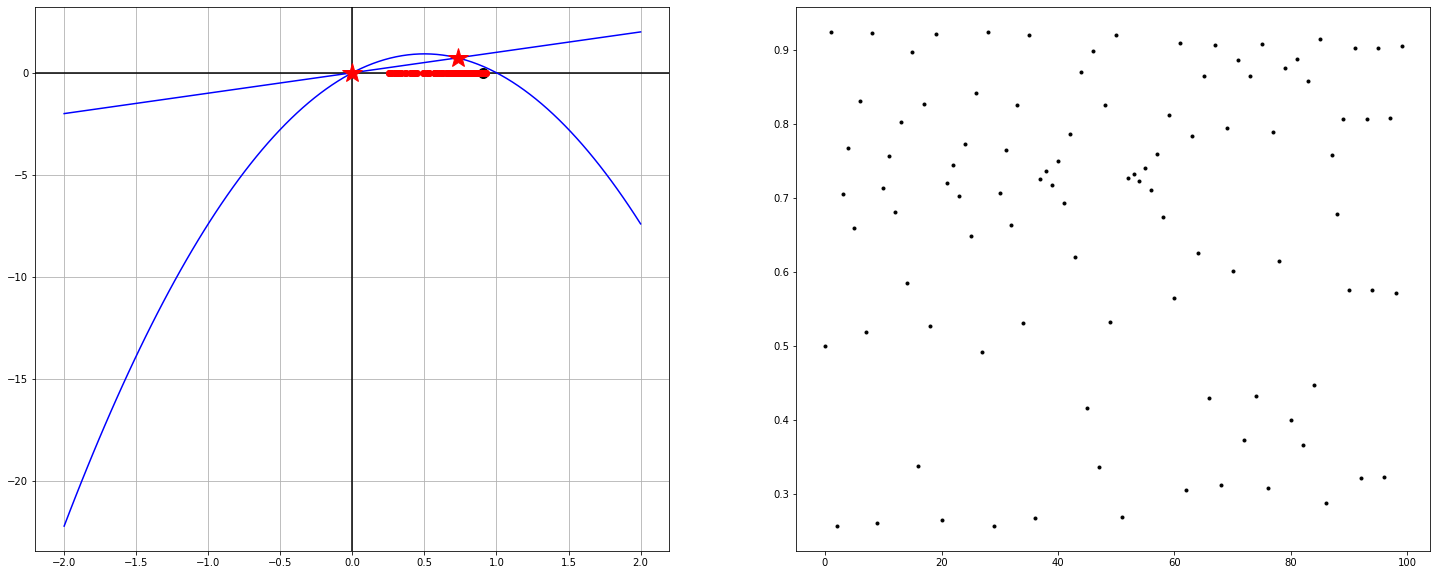

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# define the generating function f(x)
def f(x):
    return 3.7*x*(1-x)
# name the function as a string (for output to look better, purely aesthetic)
fn='3.7x(1-x)'

# Let's build a sequence 
x=[0.5]
n=100 # number of points you want to generate
for i in range(1,n):
    a=x[len(x)-1] # call the last element of the sequence x
    x.append(f(a))
print(f'\n The FPI sequence generated by f(x)={fn} is x=\n\n',x)

# Let's visualize the sequence
# Set the figure
fig,subs=plt.subplots(nrows=1,ncols=2,figsize=(25,10))

# plot the generating function, the fixed point, and the convergence of the sequence on the x-axis
subs[0].grid()
subs[0].axhline(y=0, color='k') # shows the x-axis
subs[0].axvline(x=0, color='k') # shows the v-axis
x1=np.linspace(-2,2,100)
subs[0].plot(x1,f(x1),'b')
subs[0].plot(x1,x1,'b')
subs[0].plot(0,0,'r*',markersize=20) # highlight the fixed point
subs[0].plot(0.72973,0.72973,'r*',markersize=20) # highlight the fixed point
subs[0].plot(x[len(x)-1],0,'k.',markersize=20)
subs[0].plot(x,np.zeros(n,),'r.',markersize=12)

# plot the sequence against its index
subs[1].plot(x,'k.')

# Example 5
## Babylonian method for finding the square root: The goal of this problem is to approximate the value of $\sqrt{3}$ using an FPI.

Consider an FPI with generating function $$f(x)=\frac{1}{2}\left(\frac{3}{x}+x\right)$$

1.  Find the fixed point(s) of $f$ analytically.
2. Plot a graph that shows the location of the fixed point(s) graphically. What is their approximate value (from the graph)?
3. Prove analytically that if we start with any $x_0>0$, the FPI will converge to a fixed point (Hint: use the FPI theorem).
4. Write a program that verifies the result in part 3 and deduce the approximate value of $\sqrt{3}$ from your program. 
5. Is the value for $\sqrt{3}$ that you computed numerically in part (d) correct? Up to how many digits? 

**Solutions of parts 1 and 3 are on the ipad lecture notes on canvas.**

When $x_0>0$, the fixed point iteration converges to 1.7320508075688772
The numpy value of $\sqrt(3)$ is 1.7320508075688772


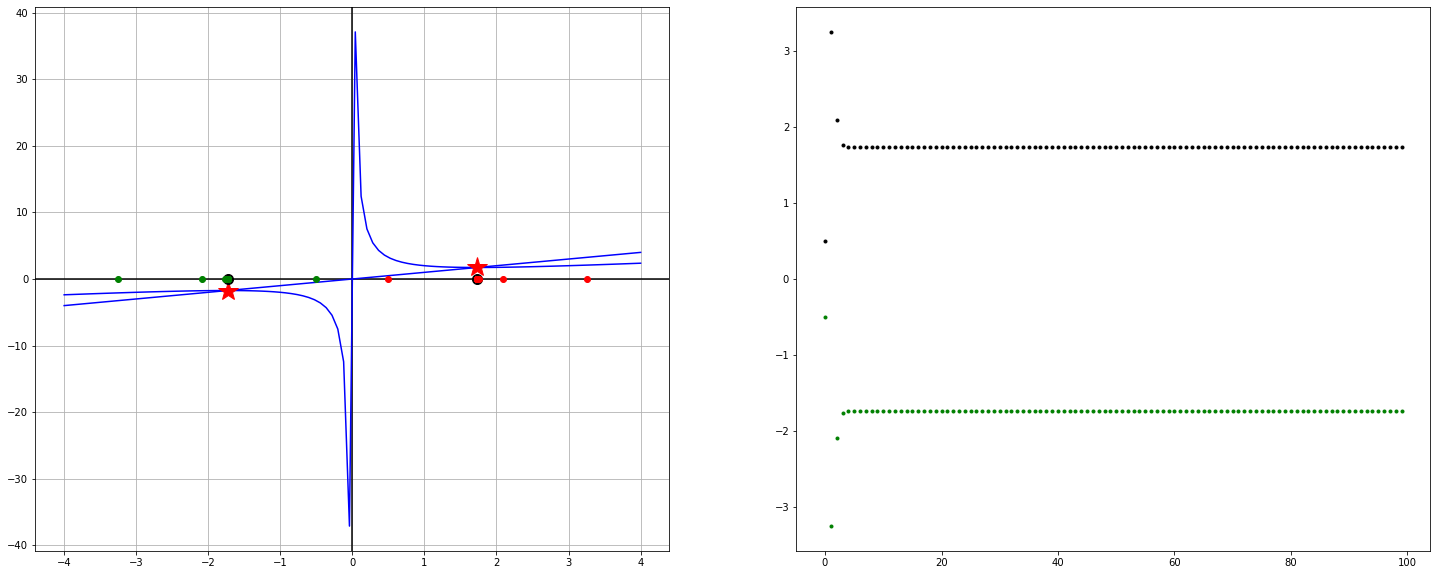

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# define the generating function f(x)
def f(x):
    return 0.5*(3/x+x)
# name the function as a string (for output to look better, purely aesthetic)
fn='0.5*(3/x+x)'

# analytical fixed points are sqrt(3) and -sqrt(3). Define these so we can highlight them on the plot
x_fixed_1=np.sqrt(3)
x_fixed_2=-np.sqrt(3)

# Let's build a sequence that starts with a positive x_0, we proved analytically that this converges to sqrt(3) 
x=[0.5]
n=100 # number of points you want to generate
for i in range(1,n):
    a=x[len(x)-1] # call the last element of the sequence x
    x.append(f(a))
    
# Let's build a sequence that starts with a negative x_0, we proved analytically that this converges to -sqrt(3) 
z=[-0.5]
n=100 # number of points you want to generate
for i in range(1,n):
    a=z[len(z)-1] # call the last element of the sequence x
    z.append(f(a))

# print(f'\n The FPI sequence generated by f(x)={fn} is x=\n\n',x)

# Let's visualize the two FPI sequences
# Set the figure
fig,subs=plt.subplots(nrows=1,ncols=2,figsize=(25,10))

# plot the generating function, the fixed point, and the convergence of the sequence on the x-axis
subs[0].grid()
subs[0].axhline(y=0, color='k') # shows the x-axis
subs[0].axvline(x=0, color='k') # shows the v-axis
x1=np.linspace(-4,4,100)
subs[0].plot(x1,f(x1),'b')
subs[0].plot(x1,x1,'b')
subs[0].plot(x_fixed_1,x_fixed_1,'r*',markersize=20) # highlight the fixed point
subs[0].plot(x_fixed_2,x_fixed_2,'r*',markersize=20) # highlight the fixed point
subs[0].plot(x[len(x)-1],0,'k.',markersize=20)
subs[0].plot(x,np.zeros(n,),'r.',markersize=12)
subs[0].plot(z[len(z)-1],0,'k.',markersize=20)
subs[0].plot(z,np.zeros(n,),'g.',markersize=12)

# plot the sequence against its index
subs[1].plot(x,'k.') 
subs[1].plot(z,'g.')

# Let's check the numerical value of the limit of the fixed point iteration:
print('When $x_0>0$, the fixed point iteration converges to', x[len(x)-1])
print('The numpy value of $\sqrt(3)$ is',np.sqrt(3))

# Example 6
## Consider the discrete logistic equation $$x_{n+1}=\alpha x_n(1-x_n)$$ 

1. Calculate the fixed point(s) analytically.
2. Verify your result from part (a) graphically (for some choice of $\alpha$).
3. Calculate the largest value of $\alpha$ under which the FPI converges (consider each fixed point separately).
4. (This belongs to the programming section) Verify your results from part (c) numerically.
5. (This belongs to the programming section) Do a numerical experiment to estimate the value of $\alpha$ that marks the onset of chaos.


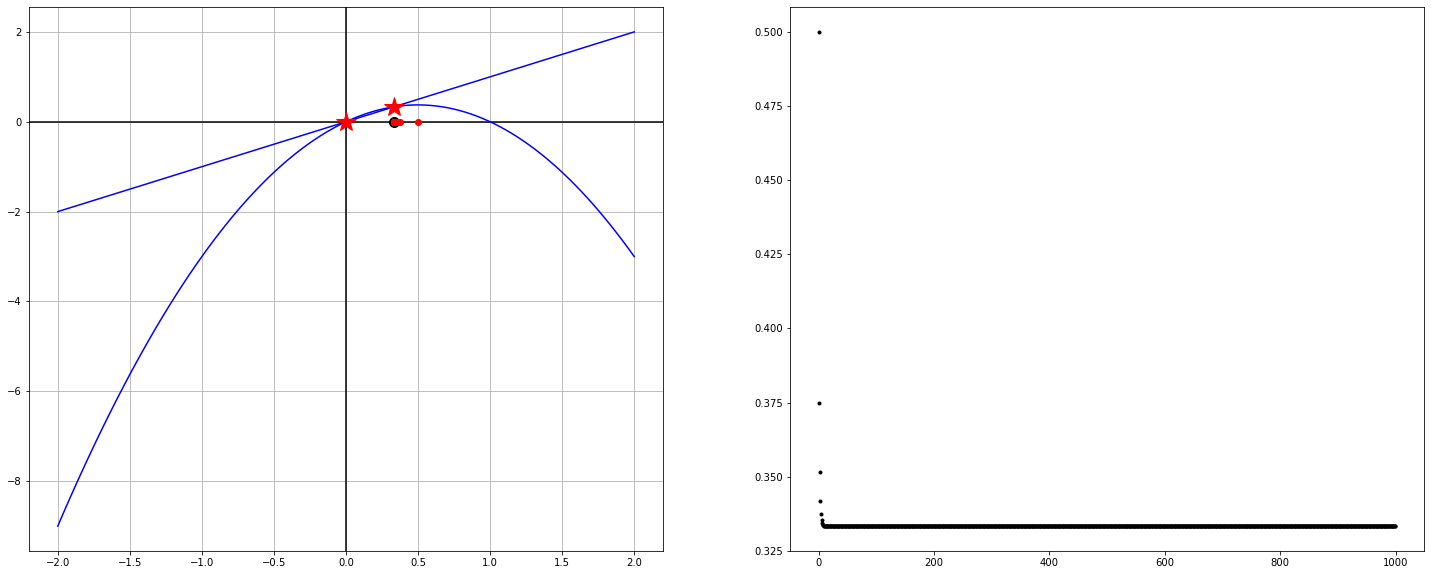

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# define the generating function f(x)
alpha=1.5
def f(x):
    return alpha*x*(1-x)
# name the function as a string (for output to look better, purely aesthetic)
fn='a x(1-x)'

# analytical fixed points are 0 and (alpha-1)/alpha
x_fixed=(alpha-1)/alpha

# Let's build a sequence 
x=[0.5]
n=1000 # number of points you want to generate
for i in range(1,n):
    a=x[len(x)-1] # call the last element of the sequence x
    x.append(f(a))

#print(f'\n The FPI sequence generated by f(x)={fn} is x=\n\n',x)

# Let's visualize the sequence
# Set the figure
fig,subs=plt.subplots(nrows=1,ncols=2,figsize=(25,10))

# plot the cos(x) function, the fixed point, and the convergence of the sequence on the x-axis
subs[0].grid()
subs[0].axhline(y=0, color='k') # shows the x-axis
subs[0].axvline(x=0, color='k') # shows the v-axis
x1=np.linspace(-2,2,100)
subs[0].plot(x1,f(x1),'b')
subs[0].plot(x1,x1,'b')
subs[0].plot(0,0,'r*',markersize=20) # highlight the fixed point
subs[0].plot(x_fixed,x_fixed,'r*',markersize=20) # highlight the nonzero fixed point
subs[0].plot(x[len(x)-1],0,'k.',markersize=20)
subs[0].plot(x,np.zeros(n,),'r.',markersize=12)

# plot the sequence against its index
subs[1].plot(x,'k.')